# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
            
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taungoo
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | xining
Processing Record 6 of Set 1 | prieska
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | nova vicosa
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | ar rutbah
Processing Record 11 of Set 1 | erriadh
City not found. Skipping...
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | ta`u
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | acarau
Processing Record 16 of Set 1 | illizi
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | bulgan
Processing Record 19 of Set 1 | lensk
Processing Record 20 of Set 1 | sao tome
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 22 of Set 1 |

Processing Record 40 of Set 4 | tapiramuta
Processing Record 41 of Set 4 | lent'ekhi
Processing Record 42 of Set 4 | itoman
Processing Record 43 of Set 4 | cartagena
Processing Record 44 of Set 4 | bardai
Processing Record 45 of Set 4 | villa gesell
Processing Record 46 of Set 4 | kununurra
Processing Record 47 of Set 4 | betio village
Processing Record 48 of Set 4 | rapar
Processing Record 49 of Set 4 | golhisar
Processing Record 0 of Set 5 | hithadhoo
Processing Record 1 of Set 5 | flying fish cove
Processing Record 2 of Set 5 | weiser
Processing Record 3 of Set 5 | yuzhno-kurilsk
Processing Record 4 of Set 5 | nemuro
Processing Record 5 of Set 5 | port mathurin
Processing Record 6 of Set 5 | thompson
Processing Record 7 of Set 5 | kruisfontein
Processing Record 8 of Set 5 | la passe
Processing Record 9 of Set 5 | vernon
Processing Record 10 of Set 5 | asubulaq
Processing Record 11 of Set 5 | poronaysk
Processing Record 12 of Set 5 | nizip
Processing Record 13 of Set 5 | kataragama
C

Processing Record 33 of Set 8 | smithers
Processing Record 34 of Set 8 | russkiy
Processing Record 35 of Set 8 | karkira
Processing Record 36 of Set 8 | duncan town
City not found. Skipping...
Processing Record 37 of Set 8 | champerico
Processing Record 38 of Set 8 | barra de santo antonio
Processing Record 39 of Set 8 | sitka
Processing Record 40 of Set 8 | floro
Processing Record 41 of Set 8 | las vegas
Processing Record 42 of Set 8 | lidzbark warminski
Processing Record 43 of Set 8 | biltine
Processing Record 44 of Set 8 | howrah
Processing Record 45 of Set 8 | omuthiya
City not found. Skipping...
Processing Record 46 of Set 8 | miri
Processing Record 47 of Set 8 | piacabucu
Processing Record 48 of Set 8 | troitsk
Processing Record 49 of Set 8 | souillac
Processing Record 0 of Set 9 | sambava
Processing Record 1 of Set 9 | batang
Processing Record 2 of Set 9 | malmberget
Processing Record 3 of Set 9 | hendersonville
Processing Record 4 of Set 9 | puerto penasco
Processing Record 5 o

Processing Record 25 of Set 12 | saint-philippe
Processing Record 26 of Set 12 | at taj
Processing Record 27 of Set 12 | padangsidempuan
Processing Record 28 of Set 12 | markala
Processing Record 29 of Set 12 | pangoa
Processing Record 30 of Set 12 | arkhangel'sk
Processing Record 31 of Set 12 | tezpur
Processing Record 32 of Set 12 | velikiy ustyug
Processing Record 33 of Set 12 | verkhovazh'ye
Processing Record 34 of Set 12 | mathba
Processing Record 35 of Set 12 | tyazhinskiy
Processing Record 36 of Set 12 | san andres
Processing Record 37 of Set 12 | cole harbour
Processing Record 38 of Set 12 | hadibu
Processing Record 39 of Set 12 | christchurch
Processing Record 40 of Set 12 | noumea
Processing Record 41 of Set 12 | fu'an
Processing Record 42 of Set 12 | tanjung selor
City not found. Skipping...
Processing Record 43 of Set 12 | zarumilla
Processing Record 44 of Set 12 | santana
Processing Record 45 of Set 12 | bandar-e genaveh
Processing Record 46 of Set 12 | surab
Processing Re

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          611
Lat           611
Lng           611
Max Temp      611
Humidity      611
Cloudiness    611
Wind Speed    611
Country       611
Date          611
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taungoo,18.9333,96.4333,22.41,87,56,1.37,MM,1701650637
1,portland,45.5234,-122.6762,14.69,94,100,2.68,US,1701649950
2,grytviken,-54.2811,-36.5092,0.77,73,8,1.96,GS,1701650637
3,lebu,-37.6167,-73.6500,11.42,80,0,10.81,CL,1701650637
4,xining,36.6167,101.7667,-1.86,39,0,1.10,CN,1701650637


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taungoo,18.9333,96.4333,22.41,87,56,1.37,MM,1701650637
1,portland,45.5234,-122.6762,14.69,94,100,2.68,US,1701649950
2,grytviken,-54.2811,-36.5092,0.77,73,8,1.96,GS,1701650637
3,lebu,-37.6167,-73.6500,11.42,80,0,10.81,CL,1701650637
4,xining,36.6167,101.7667,-1.86,39,0,1.10,CN,1701650637


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

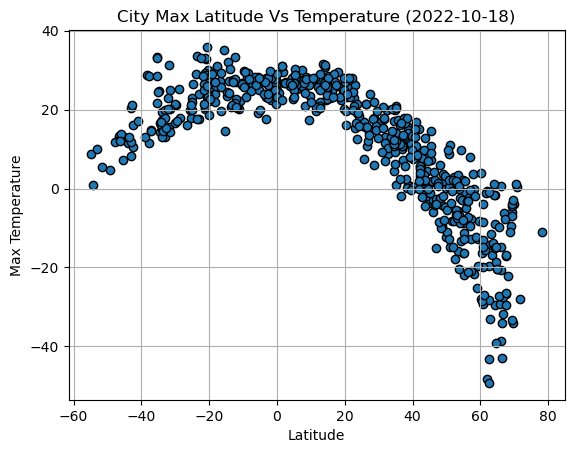

In [14]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude Vs Temperature (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

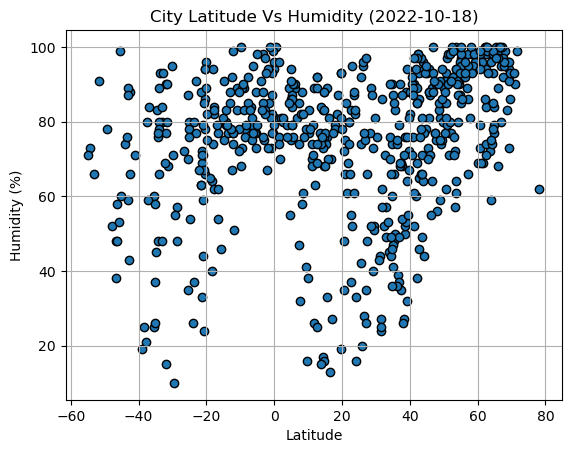

In [15]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs Humidity (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

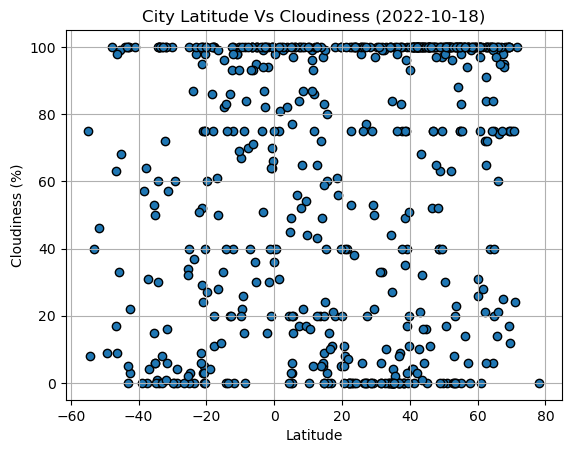

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs Cloudiness (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

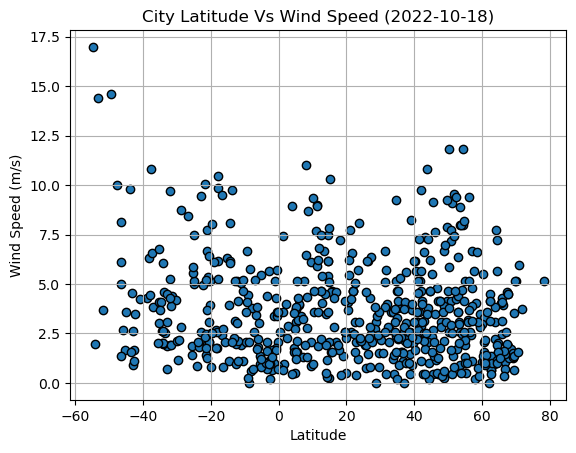

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs Wind Speed (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taungoo,18.9333,96.4333,22.41,87,56,1.37,MM,1701650637
1,portland,45.5234,-122.6762,14.69,94,100,2.68,US,1701649950
4,xining,36.6167,101.7667,-1.86,39,0,1.10,CN,1701650637
8,ar rutbah,33.0381,40.2848,12.72,49,10,3.56,IQ,1701650638
11,talnakh,69.4865,88.3972,-34.16,86,12,0.65,RU,1701650638


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,0.77,73,8,1.96,GS,1701650637
3,lebu,-37.6167,-73.6500,11.42,80,0,10.81,CL,1701650637
5,prieska,-29.6641,22.7474,21.22,10,0,1.15,ZA,1701650637
6,blackmans bay,-43.0167,147.3167,20.41,59,100,0.89,AU,1701650637
7,nova vicosa,-17.8919,-39.3719,25.52,84,11,5.25,BR,1701650637


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7808144157259941


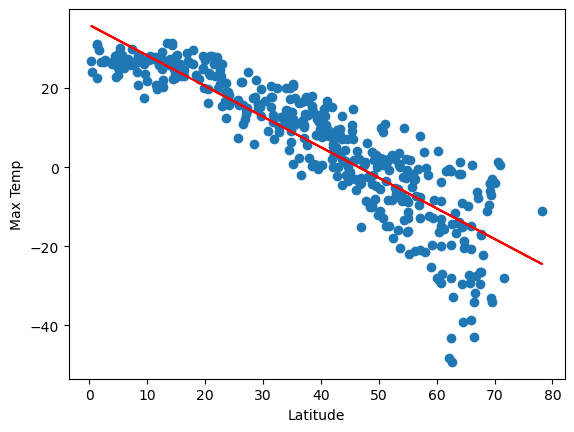

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,240),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()


The r-value is: 0.42015876109103667


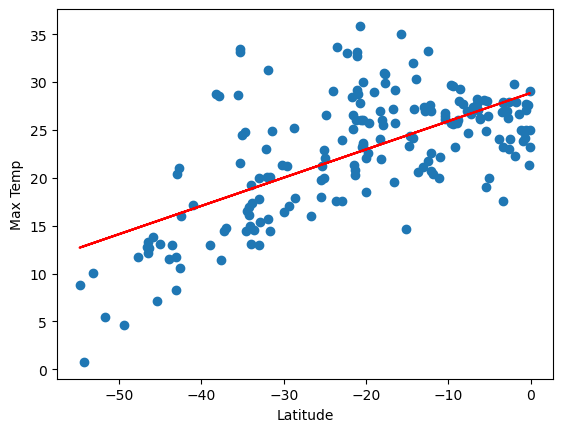

In [22]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,280),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

The closer the latitude gets to zero the warmer the max temperture 
there is a postive correlation between max temperture and the latitude 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13023193584782658


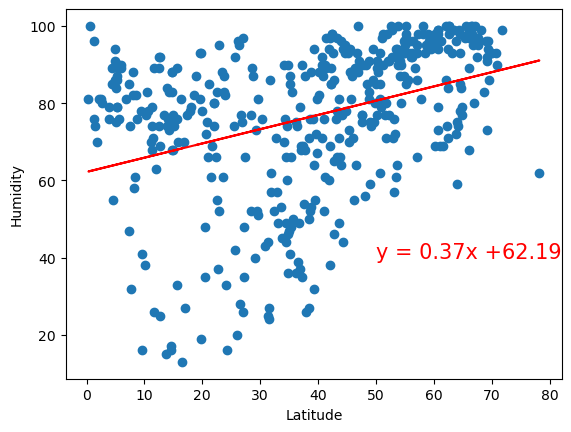

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.1647427904866722


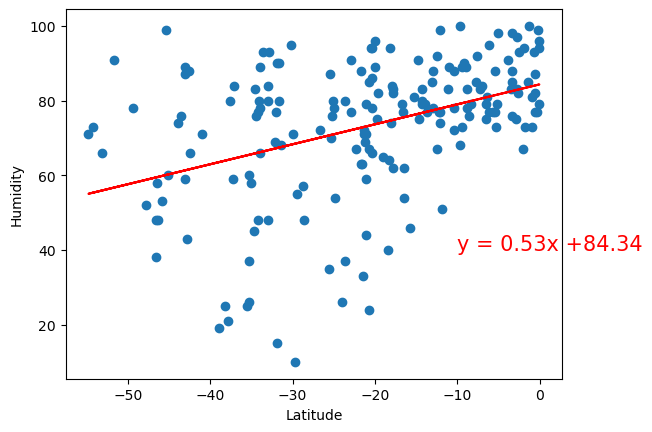

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
There is a week correlation between humididity and maxium tempertature as the r value is low 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.055175285154460255


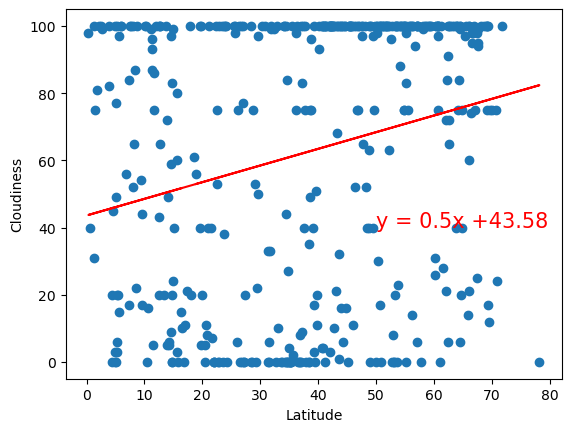

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.064549880082602


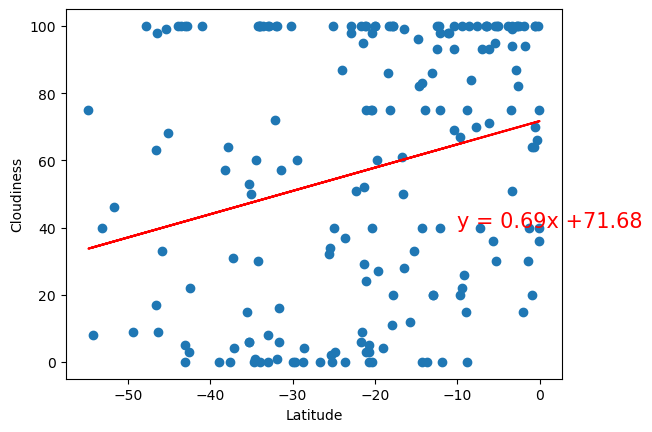

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Weak correlation between cloudiness and latitiude due to low r value


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008296855418939009


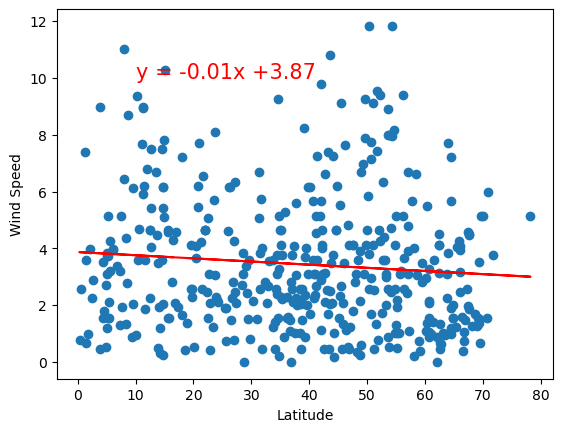

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.10718567798737559


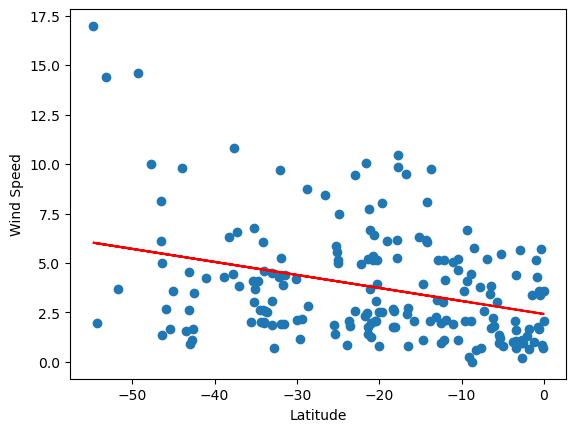

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Weak relationship between latitude and wind speed from